# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [51]:
df_cancer_info = pd.read_csv('breast-cancer-wisconsin.data.txt', header = None)

df_cancer_info.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [52]:
df_cancer_info.columns = ['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df_cancer_info.head()


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [53]:
df_cancer_info.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [54]:

df_cancer_info['Bare_Nuclei'].value_counts()
# Bare Nuclei has 16 '?' (not defined) which has to be handled

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [55]:
df_cancer_info.shape


(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [56]:
# We could see "?" values in column, this should be removed from data set
df_cancer_info[df_cancer_info.Bare_Nuclei != '?']

# Check for missing value in any other column

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [17]:
df_cancer_info.isnull().sum()
# No missing values

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [57]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df_cancer_info['Bare_Nuclei'].value_counts()
# 16 rows have ?

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [58]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Imputing msiing values with the mode
df_cancer_info['Bare_Nuclei'].replace('?', 0, inplace = True)
df_cancer_info['Bare_Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [59]:
# Now replacing 0 with mean
df_cancer_info['Bare_Nuclei'] = df_cancer_info['Bare_Nuclei'].astype(int)
df_cancer_info['Bare_Nuclei'].replace(0,df_cancer_info['Bare_Nuclei'].mode()[0] , inplace = True)


In [61]:
df_cancer_info.dtypes

Sample_code_number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [62]:
df_cancer_info['Bare_Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [63]:
# Check for correlation of variable
df_cancer_info.corr()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code_number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump_Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

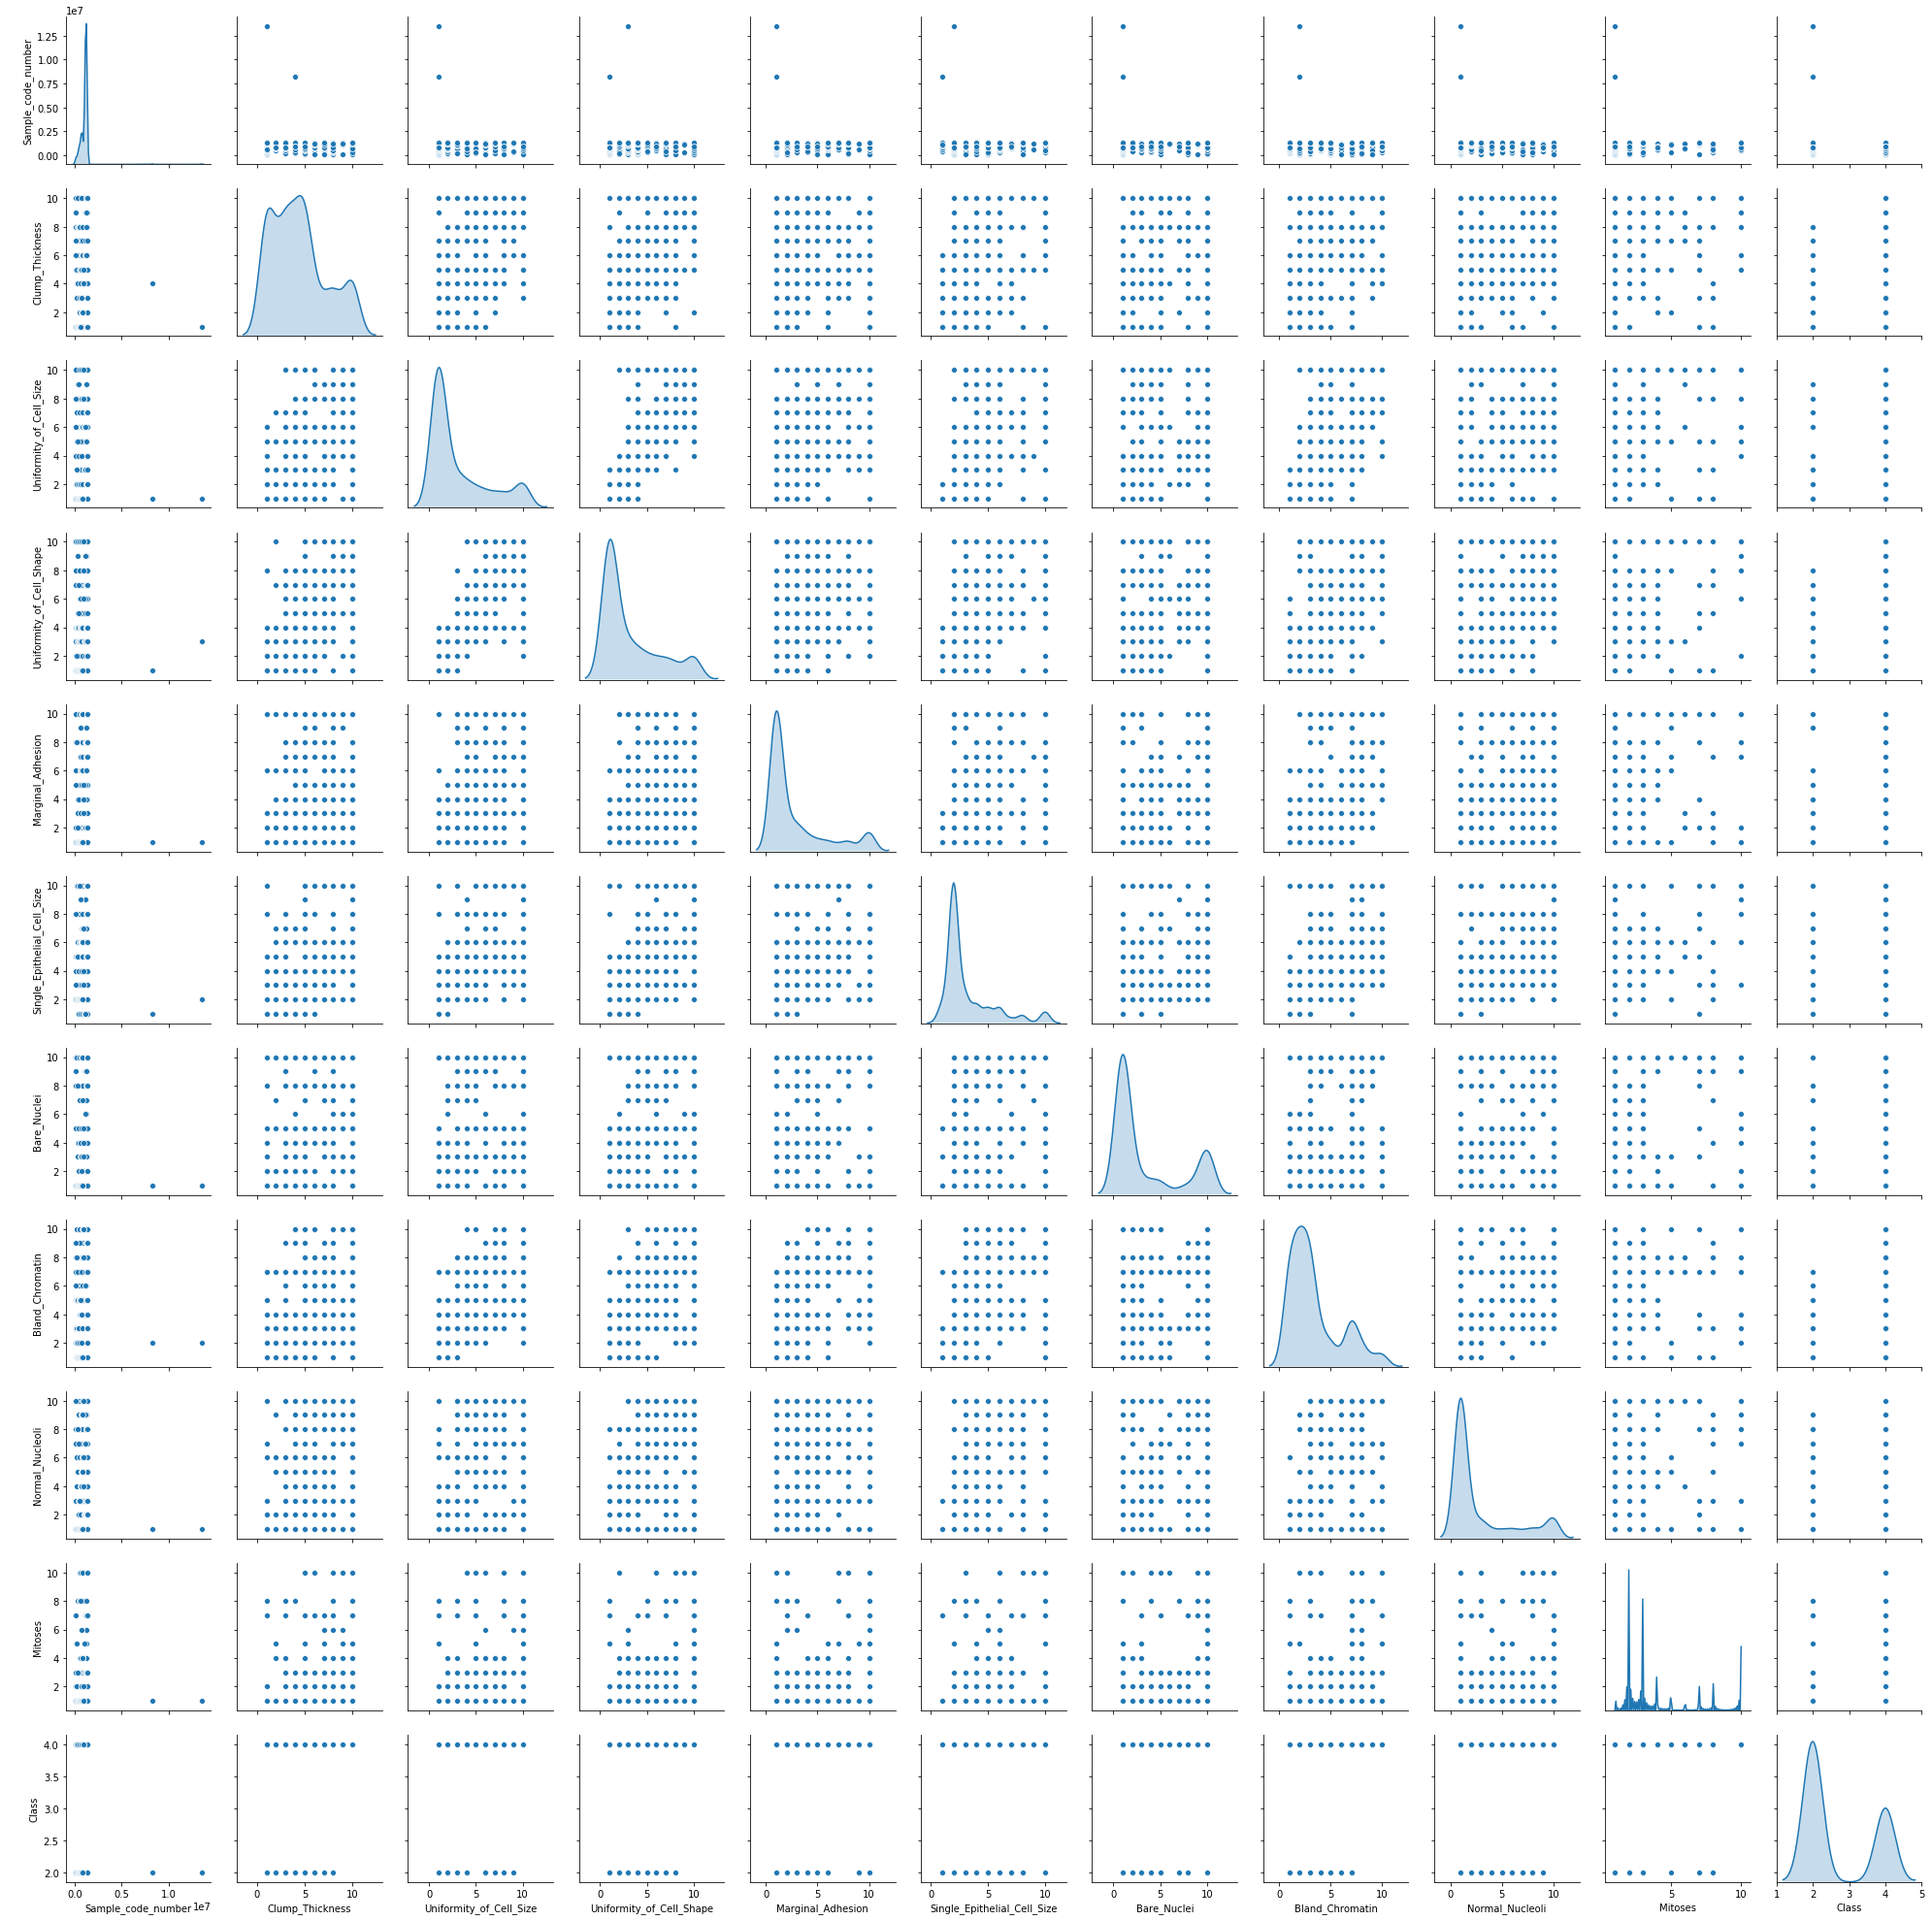

In [43]:
#Let us check for pair plots
sns.pairplot(df_cancer_info, diag_kind="kde")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.


In [64]:
# Sample_code_number can be removed as it does not contribute to the model
df_cancer_info.drop('Sample_code_number', inplace = True, axis = 1)

In [65]:
df_cancer_info.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [72]:
pd.crosstab(df_cancer_info['Mitoses'],df_cancer_info['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,3,49


In [71]:
df_cancer_info['Mitoses'] = np.where(df_cancer_info['Mitoses']>4,4,df_cancer_info['Mitoses'])
# Outlier for mitosis treated using cross-tab technique

In [74]:
pd.crosstab(df_cancer_info['Single_Epithelial_Cell_Size'],df_cancer_info['Class'])

Class,2,4
Single_Epithelial_Cell_Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [75]:
df_cancer_info['Single_Epithelial_Cell_Size'] = np.where(df_cancer_info['Single_Epithelial_Cell_Size']>6,7,df_cancer_info['Single_Epithelial_Cell_Size'])
# Outlier for Single_Epithelial_Cell_Size treated

In [79]:
pd.crosstab(df_cancer_info['Normal_Nucleoli'],df_cancer_info['Class'])

Class,2,4
Marginal_Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [80]:
df_cancer_info['Marginal_Adhesion'] = np.where(df_cancer_info['Marginal_Adhesion']>3,4,df_cancer_info['Marginal_Adhesion'])
# Outlier for Marginal_Adhesion treated

In [82]:
from scipy.stats import zscore
# Standardizing data
df_cancer_info = df_cancer_info.apply(zscore) 
df_cancer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,1.655011e-16,1.000716,-1.214667,-0.859266,-0.148465,0.562336,1.983939
Uniformity_of_Cell_Size,699.0,-2.801765e-16,1.000716,-0.699995,-0.699995,-0.699995,0.611792,2.251526
Uniformity_of_Cell_Shape,699.0,-5.854481e-16,1.000716,-0.743299,-0.743299,-0.743299,0.603599,2.287222
Marginal_Adhesion,699.0,2.363393e-16,1.000716,-0.776593,-0.776593,-0.776593,1.543230,1.543230
Single_Epithelial_Cell_Size,699.0,1.651834e-17,1.000716,-1.153579,-0.590091,-0.590091,0.536886,2.227351
Bare_Nuclei,699.0,7.026648e-16,1.000716,-0.686979,-0.686979,-0.686979,0.418196,1.799664
Bland_Chromatin,699.0,6.251556e-16,1.000716,-1.000471,-0.590067,-0.179662,0.641147,2.693171
Normal_Nucleoli,699.0,3.874662e-16,1.000716,-0.611825,-0.611825,-0.611825,0.371315,2.337594
Mitoses,699.0,-7.712794e-16,1.000716,-0.418112,-0.418112,-0.418112,-0.418112,2.993489
Class,699.0,8.697541e-16,1.000716,-0.725397,-0.725397,-0.725397,1.378555,1.378555


In [95]:
df_cancer_info.drop('Class', inplace = True, axis = 1)

# Q6 Create a covariance matrix for identifying Principal components

In [100]:
# PCA
# Step 1 - Create covariance matrix
cov_mat = np.cov(df_cancer_info.T)

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [101]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)
print('****')
print(eig_vecs)

[6.05114218 0.70408359 0.08828716 0.52071618 0.45427919 0.24915351
 0.34337647 0.31348601 0.28836969]
****
[[-0.30240063  0.05845215 -0.00903562  0.83112358  0.38241076 -0.18815978
  -0.13288991 -0.11518403  0.04147251]
 [-0.37549621  0.05290157 -0.73531176 -0.10982126  0.19155724  0.37277947
   0.26829638  0.07594193  0.22372101]
 [-0.37190386  0.0934349   0.66224861 -0.0534897   0.19833594  0.53129747
   0.25831005  0.11455756  0.10030661]
 [-0.33417729  0.19336611  0.04460914 -0.0377252  -0.49776385  0.0175386
  -0.15686449 -0.67911407  0.33710989]
 [-0.34497834 -0.07256213  0.07594271 -0.27179358  0.18290604 -0.61300627
   0.55932017 -0.20094579 -0.18340141]
 [-0.33236239  0.15912849 -0.08210858  0.23115769 -0.56371033  0.08430646
   0.1064467   0.26928536 -0.628741  ]
 [-0.34142267  0.24594833  0.06334415 -0.17092117 -0.10314894 -0.39206299
  -0.3170488   0.59532868  0.41282464]
 [-0.33293905 -0.06397908 -0.03288692 -0.36184156  0.35075222  0.0778373
  -0.62442616 -0.17179109 -0.4

# Q8 Find variance and cumulative variance by each eigen vector

In [102]:
total = 0
for i in eig_vals:
    total = total+i
total

9.01289398280802

In [103]:
total_var = eig_vals/total * 100
total_var

array([67.13872581,  7.81195912,  0.97956507,  5.77745812,  5.04032548,
        2.76441188,  3.80983584,  3.47819485,  3.19952382])

In [105]:
np.cumsum(total_var)

array([ 67.13872581,  74.95068493,  75.93025   ,  81.70770812,
        86.7480336 ,  89.51244548,  93.32228132,  96.80047618,
       100.        ])

In [109]:
# 93% variance is captured for 7 components. So take n_components = 7

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca.fit(df_cancer_info)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
print(pca.explained_variance_)

[6.05114218 0.70408359 0.52071618 0.45427919 0.34337647 0.31348601
 0.28836969]


In [112]:
np.cumsum(pca.explained_variance_ratio_)

array([0.67138726, 0.74950685, 0.80728143, 0.85768469, 0.89578304,
       0.93056499, 0.96256023])

In [113]:
1transformed_values = pca.transform(df_cancer_info)

In [123]:
transformed_values.shape

(699, 7)

In [124]:
abc = df_cancer_info
abc.shape

(699, 9)

In [126]:
abc = pd.DataFrame(data=transformed_values)  
abc

,0,1,2,3,4,5,6
0,-1.536152,-0.069950,0.540756,0.356207,-0.221837,-0.255540,0.198294
1,1.891728,-0.835247,-0.018376,-1.181176,1.575078,1.082282,-0.926627
2,-1.659269,-0.072369,0.013860,-0.071361,-0.097969,-0.411815,-0.004902
3,1.434457,-0.397609,-0.215081,1.724845,0.131303,-0.431144,-0.550727
4,-1.126803,-0.348226,0.187031,-0.549519,-0.417207,0.753807,0.704912
5,5.090651,-1.691229,-0.470174,0.324916,0.679315,-0.360247,0.035945
6,-1.139578,-0.382550,-0.065964,-1.589176,0.231774,-1.088902,-1.424118
7,-1.733343,-0.039090,-0.363400,0.015264,0.006829,-0.416924,0.187852
8,-1.298446,3.344199,0.046522,-0.691136,-0.046954,-0.227840,0.304972
9,-1.660604,0.034413,0.279506,0.325451,0.043497,-0.077055,0.087498


# Q10 Find correlation between components and features

In [128]:
abc.corr()

,0,1,2,3,4,5,6
0,1.000000e+00,1.154715e-14,-9.799278e-16,-2.841579e-16,-1.896823e-16,-3.228971e-16,-8.929580e-16
1,1.154715e-14,1.000000e+00,1.544612e-16,3.206167e-17,-6.469749e-18,1.354234e-16,-2.005009e-16
2,-9.799278e-16,1.544612e-16,1.000000e+00,5.338829e-16,-7.565455e-17,1.582600e-16,1.559779e-17
3,-2.841579e-16,3.206167e-17,5.338829e-16,1.000000e+00,5.392734e-16,5.142143e-17,-2.386264e-16
4,-1.896823e-16,-6.469749e-18,-7.565455e-17,5.392734e-16,1.000000e+00,-6.526588e-16,3.482683e-16
5,-3.228971e-16,1.354234e-16,1.582600e-16,5.142143e-17,-6.526588e-16,1.000000e+00,-3.914737e-17
6,-8.929580e-16,-2.005009e-16,1.559779e-17,-2.386264e-16,3.482683e-16,-3.914737e-17,1.000000e+00


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [146]:
ratings = pd.read_csv('jokes.csv', header = 0)

ratings.head()


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [147]:
ratings.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [148]:
ratings = ratings.iloc[:200,1:]
ratings.shape

(200, 100)

In [149]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [152]:
ratings.replace(99,0, inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfTest = scaler.fit_transform(ratings)

dfTest

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

In [156]:
ratings_diff = pd.DataFrame(data=dfTest)  
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [159]:
jokes_mean = []
for column in ratings_diff.columns:
    jokes_mean.append(ratings_diff[column].mean())
jokes_mean

[-1.1102230246251566e-17,
 -9.658940314238862e-17,
 -4.107825191113079e-17,
 3.7192471324942746e-17,
 -8.881784197001253e-18,
 -2.636779683484747e-18,
 -1.6653345369377347e-18,
 2.3314683517128286e-17,
 -4.3298697960381107e-17,
 -2.55351295663786e-17,
 -4.5519144009631415e-17,
 -8.604228440844963e-17,
 6.661338147750939e-17,
 5.467848396278896e-17,
 -2.1649348980190553e-17,
 -1.0658141036401502e-16,
 1.6375789613221058e-17,
 2.3314683517128286e-17,
 -9.159339953157542e-18,
 2.997602166487923e-17,
 1.0658141036401502e-16,
 1.7208456881689926e-17,
 -2.7755575615628914e-17,
 4.3298697960381107e-17,
 -3.8857805861880476e-17,
 -1.4988010832439614e-17,
 -3.9968028886505634e-17,
 -9.436895709313831e-18,
 -5.2735593669694933e-17,
 1.9984014443252817e-17,
 -9.992007221626408e-18,
 -1.0325074129013956e-16,
 1.2212453270876722e-17,
 -1.2212453270876722e-17,
 -7.549516567451065e-17,
 3.2474023470285827e-17,
 3.858025010572419e-17,
 -2.6090241078691177e-17,
 -2.3869795029440865e-17,
 1.276756478318

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [166]:
sorted_mean_indexes = sorted(range(len(jokes_mean)), key=lambda i: jokes_mean[i])[-10:]
sorted_mean_indexes

# for i in sorted_mean_indexes:
#     print(ratings_diff[i].column)

[49, 99, 73, 47, 92, 94, 20, 97, 81, 98]

In [169]:
ratings_diff.columns[sorted_mean_indexes]

Int64Index([49, 99, 73, 47, 92, 94, 20, 97, 81, 98], dtype='int64')